In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
log = pd.read_csv('subscription_logs.csv')
log

,log_id,user_id,subscription_start,subscription_end,payment_amount,payment_method
0,a9618d3d-4766-4fdc-9d62-15474055f265,6369,2019-01-01 05:21:40,2019-01-31 05:21:40,10.0,PayPal
1,4b9383e6-06e4-4b3c-b0d9-18aefdda6b69,6071,2019-01-02 07:19:38,2019-02-01 07:19:38,10.0,Gift Card
2,206b1198-4622-421b-bdfe-aeb3127d25f5,2830,2019-01-03 15:07:47,2019-02-02 15:07:47,10.0,PayPal
3,69bb6c16-0a08-4ab1-bda5-7abb888c3c0a,1986,2019-01-03 16:28:49,2019-02-02 16:28:49,10.0,Credit Card
4,0ffec7cb-6dba-4872-9ac7-9e6b27cf3bf5,4812,2019-01-04 02:28:06,2019-02-03 02:28:06,10.0,PayPal
...,...,...,...,...,...,...
100440,53aba7e7-b764-44c0-a75e-95dbb3fe69ec,1751,2024-09-24 19:26:39,2024-10-24 19:26:39,10.0,Credit Card
100441,1a0865b3-c37e-43c1-b7d5-3f9ffb6b2f92,3005,2024-09-24 19:29:31,2024-10-24 19:29:31,10.0,PayPal
100442,0a8685f5-6a18-4188-89c3-66748b7c41f2,7199,2024-09-24 19:37:45,2024-10-24 19:37:45,10.0,Credit Card
100443,aadf5b92-fac0-4e4c-8313-36a375ca241f,8116,2024-09-24 19:39:35,2024-10-24 19:39:35,10.0,Credit Card


In [ ]:
log['subscription_start'] = pd.to_datetime(log['subscription_start'])
log['subscription_end'] = pd.to_datetime(log['subscription_end'])

log['CohortGroup'] = log.groupby('user_id')['subscription_start'].transform('min').dt.to_period('M')

log['OrderPeriod'] = log['subscription_start'].dt.to_period('M')

In [ ]:
log['CohortIndex'] = ((log['OrderPeriod'].dt.to_timestamp() - log['CohortGroup'].dt.to_timestamp()).apply(lambda x: x.days // 30)
)

In [ ]:
cohort_data = log.groupby(['CohortGroup', 'CohortIndex']).agg({'user_id': 'nunique'}).reset_index()
cohort_pivot = cohort_data.pivot(index='CohortGroup', columns='CohortIndex', values='user_id')

In [ ]:
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

In [7]:
cohort_pivot

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,69
CohortGroup,,,,,,,,,,,,,,,,,,,,,
2019-01,48.0,48.0,NaN,48.0,48.0,48.0,48.0,48.0,48.0,48.0,...,48.0,48.0,45.0,48.0,48.0,48.0,48.0,48.0,48.0,33.0
2019-02,25.0,25.0,25.0,NaN,25.0,25.0,25.0,25.0,25.0,25.0,...,25.0,23.0,25.0,25.0,25.0,25.0,25.0,25.0,20.0,NaN
2019-03,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,...,41.0,42.0,42.0,42.0,42.0,42.0,NaN,42.0,31.0,NaN
2019-04,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,...,51.0,51.0,51.0,51.0,51.0,51.0,NaN,43.0,NaN,NaN
2019-05,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,34.0,...,35.0,35.0,35.0,35.0,35.0,NaN,31.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05,27.0,27.0,27.0,27.0,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06,32.0,32.0,32.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07,33.0,33.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
retention

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,69
CohortGroup,,,,,,,,,,,,,,,,,,,,,
2019-01,1.0,1.000000,NaN,1.0000,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.00000,1.00,0.9375,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.6875
2019-02,1.0,1.000000,1.000000,NaN,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.00000,0.92,1.0000,1.0,1.0,1.0,1.000000,1.000000,0.800000,NaN
2019-03,1.0,1.000000,1.000000,1.0000,1.000000,1.0,1.0,1.0,1.0,1.000000,...,0.97619,1.00,1.0000,1.0,1.0,1.0,NaN,1.000000,0.738095,NaN
2019-04,1.0,1.000000,1.000000,1.0000,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.00000,1.00,1.0000,1.0,1.0,1.0,NaN,0.843137,NaN,NaN
2019-05,1.0,1.000000,1.000000,1.0000,1.000000,1.0,1.0,1.0,1.0,0.971429,...,1.00000,1.00,1.0000,1.0,1.0,NaN,0.885714,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05,1.0,1.000000,1.000000,1.0000,0.777778,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06,1.0,1.000000,1.000000,0.6875,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07,1.0,1.000000,0.818182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


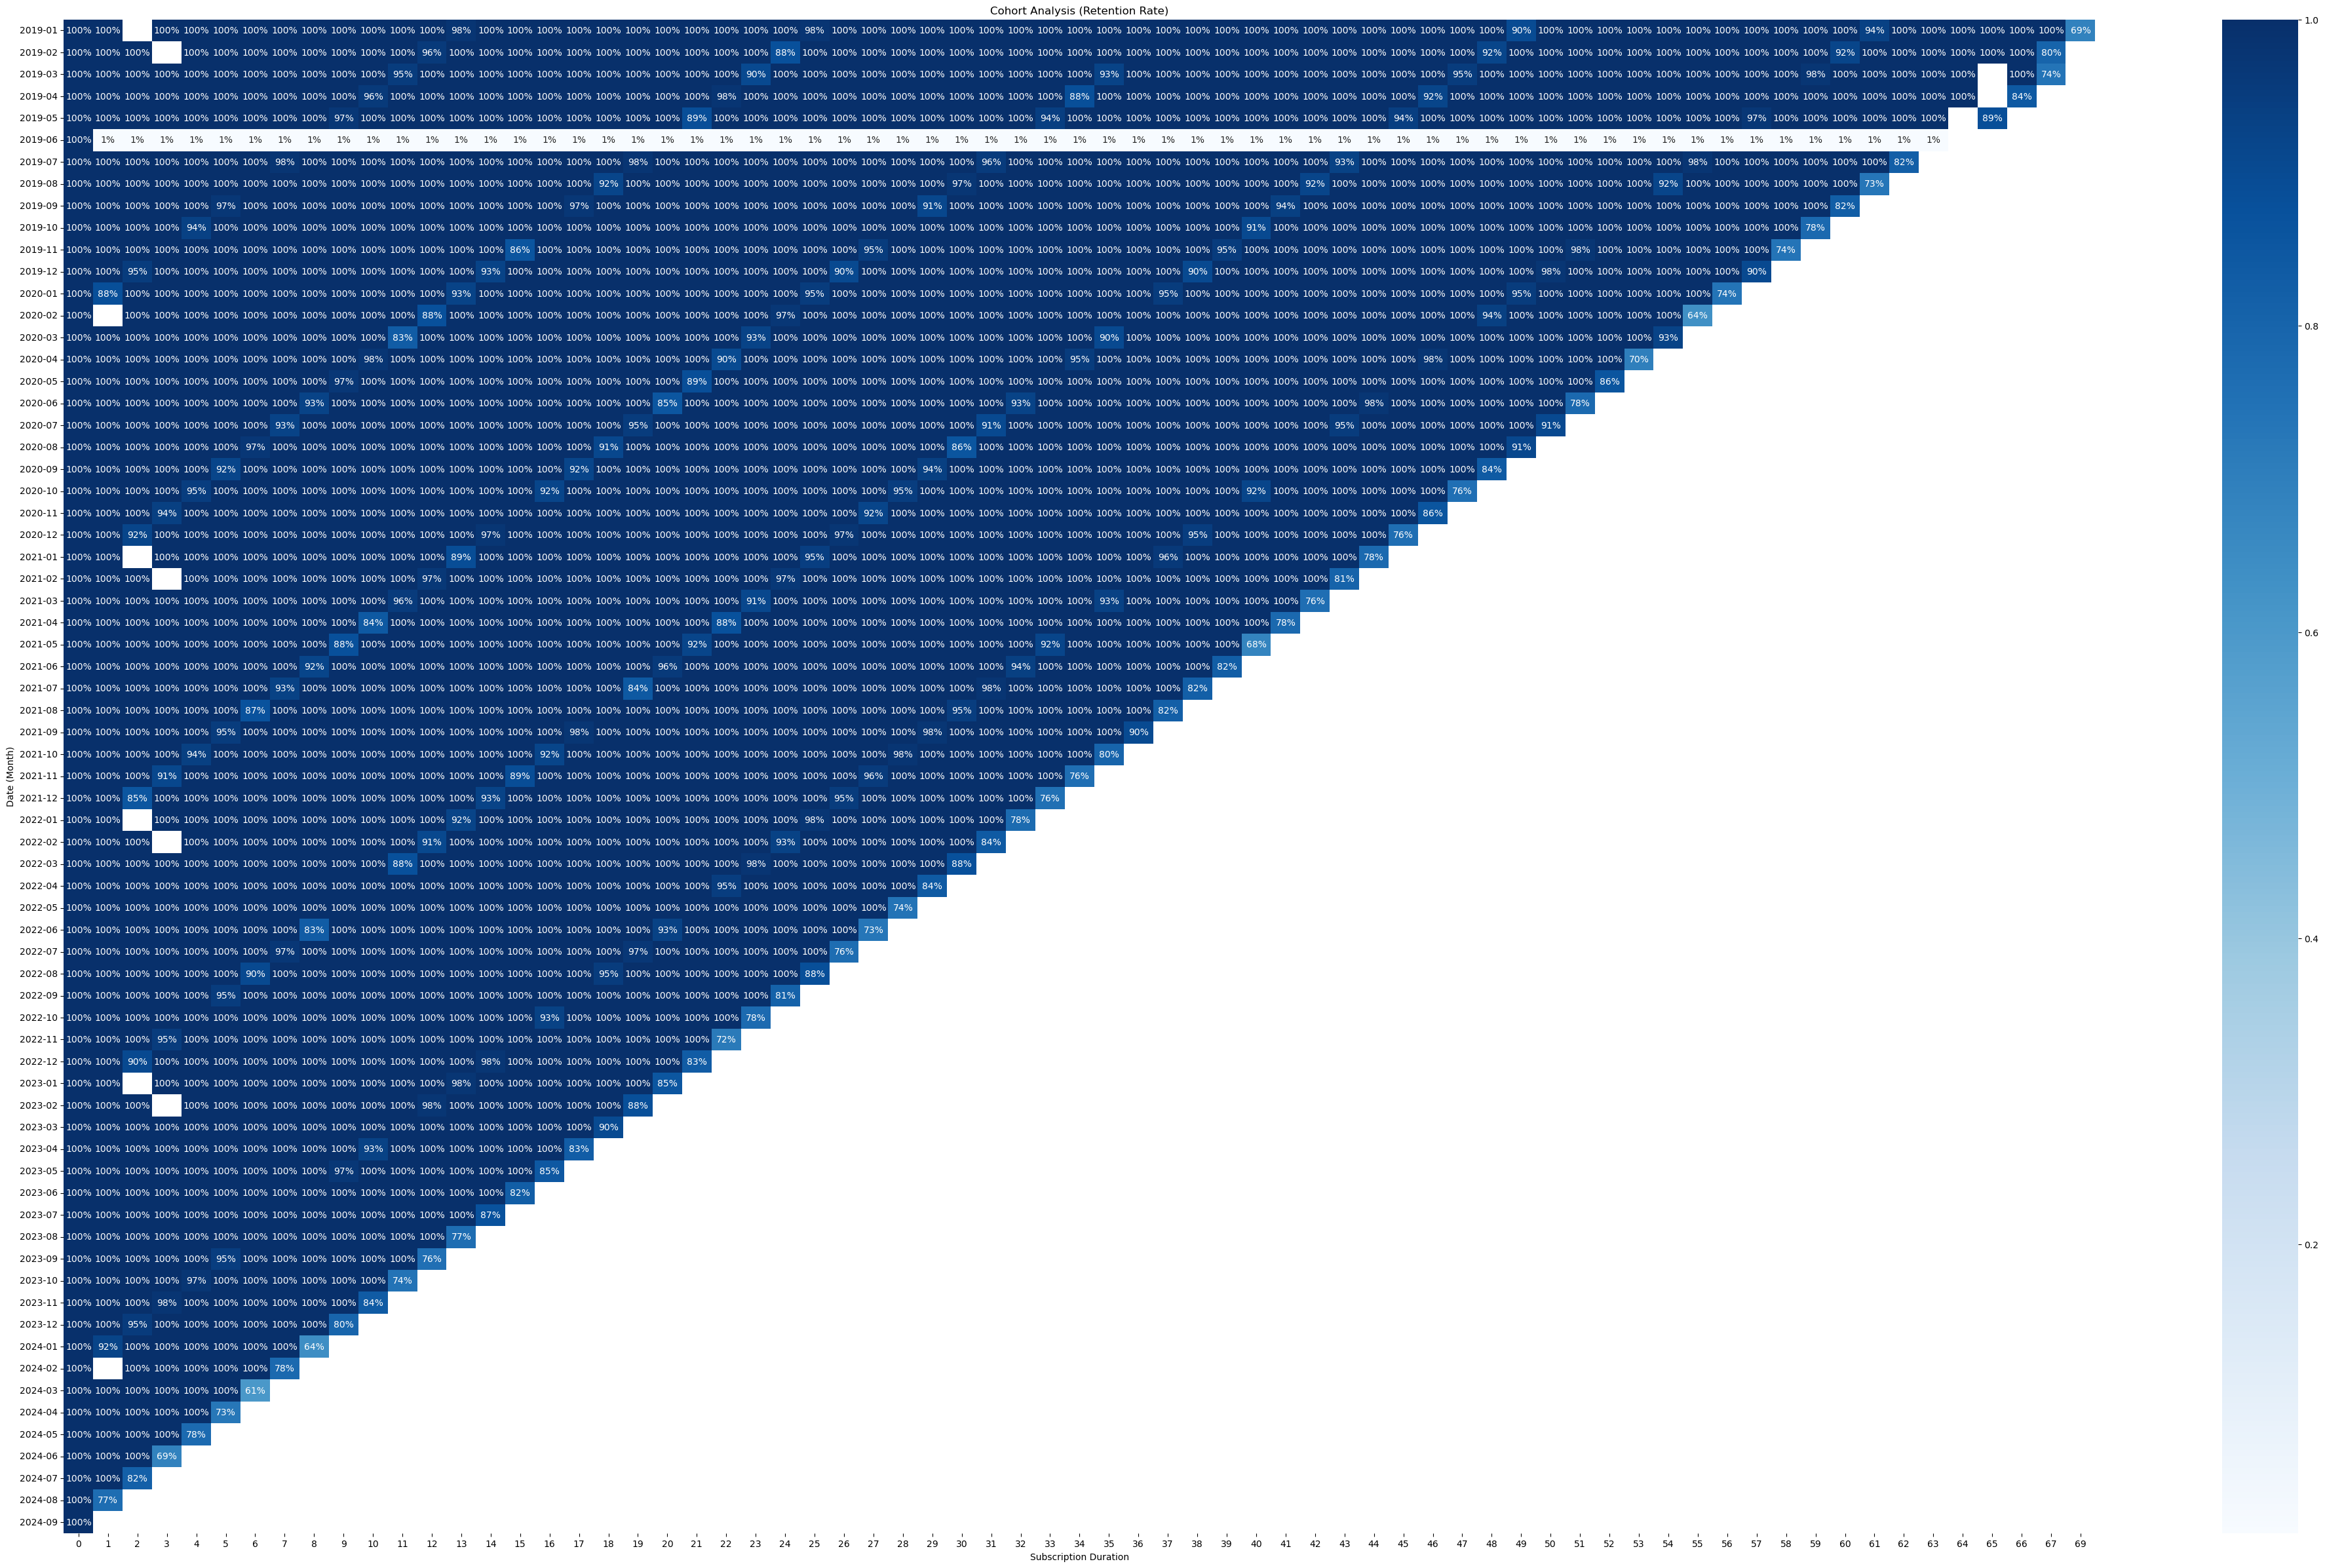

In [ ]:
plt.figure(figsize=(50,30))
sns.heatmap(retention, cmap='Blues',annot=True, fmt='.0%')
plt.title('Cohort Analysis (Retention Rate)')
plt.ylabel('Date (Month)')
plt.xlabel('Subscription Duration')
plt.show()


- 시간이 지나도 여전히 구독을 유지하는 것으로 볼 때, 해당 서비스의 고객 유지율은 매우 높음 
- 2019-06 시점에서 고객 이탈이 갑작스럽게 많아짐. 해당 시점 기준으로 감소될 패턴이 나타나지 않아 유의
- 2024-09 월을 기준으로 갑작스러운 고객 이탈이 나타남 (시뮬레이션 데이터라 조정되지 않은 결과로 추정)

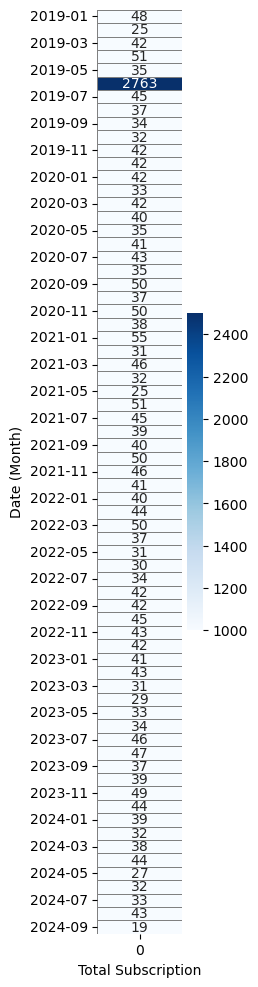

In [ ]:
plt.figure(figsize=(3, 12))
plt.subplot(1,2,1)
sns.heatmap(cohort_pivot[[0]], annot=True, fmt=".0f", cmap="Blues", cbar=True, vmin=1000, vmax=2500, linewidths=0.5, linecolor="gray")
plt.ylabel('Date (Month)')
plt.xlabel('Total Subscription')
plt.show()